# WeatherPy
----

### Analysis
* The temperature is warmer between -40 to 20 degree latitude. This is as expected as 0 degree latitude is the equator.
* There is no strong relationship between latitude and humidity as there is all level of humidity across all latitude.
* There is also no strong relationship between latitude and cloudiness as there are cities with different level of cloudiness.
* Most cities experience wind speed below 20 mph.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [50]:
# dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# import API key
import api_keys

# include citipy to determine city based on latitude and longitude
from citipy import citipy

# range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [51]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# identify nearest city for each latitude, longitude combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [52]:
# open WeatherMap API Key
api_key = api_keys.api_key

# perform API Calls
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

# get weather data
print("Beginning Data Retrival")
print("------------------------------")

set_count = 1
record_count = 1
weather_data = {"City":[],"Cloudiness":[],"Country":[],"Date":[],"Humidity":[],"Lat":[],"Lng":[],"Max Temp":[],"Wind Speed": []}

for city in cities:
    weather_response = requests.get(query_url + city)
    weather_response_json = weather_response.json()
    
    if weather_response.status_code == 200:
        weather_data["City"].append(city)
        weather_data["Cloudiness"].append(weather_response_json["clouds"]["all"])
        weather_data["Country"].append(weather_response_json["sys"]["country"])
        weather_data["Date"].append(weather_response_json["dt"])
        weather_data["Humidity"].append(weather_response_json["main"]["humidity"])
        weather_data["Lat"].append(weather_response_json["coord"]["lat"])
        weather_data["Lng"].append(weather_response_json["coord"]["lon"])
        weather_data["Max Temp"].append(weather_response_json["main"]["temp_max"])
        weather_data["Wind Speed"].append(weather_response_json["wind"]["speed"])
        if record_count <= 50:
            print(f"Processing Record {record_count} of Set {set_count} | {city}")
            record_count += 1 
        else:
            record_count = 0
            set_count += 1
            print(f"Processing Record {record_count} of Set {set_count} | {city}")
            record_count += 1
    else:
        print("City not found. Skipping...")
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")

Beginning Data Retrival
------------------------------
Processing Record 1 of Set 1 | ginir
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | ukiah
Processing Record 4 of Set 1 | hokitika
Processing Record 5 of Set 1 | purranque
Processing Record 6 of Set 1 | mpanda
Processing Record 7 of Set 1 | mumford
Processing Record 8 of Set 1 | dobryatino
Processing Record 9 of Set 1 | half moon bay
Processing Record 10 of Set 1 | neiafu
Processing Record 11 of Set 1 | kununurra
Processing Record 12 of Set 1 | nalut
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | fortuna
Processing Record 16 of Set 1 | khandyga
Processing Record 17 of Set 1 | clyde river
Processing Record 18 of Set 1 | ngunguru
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | esperance
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | belyy yar
Processing

Processing Record 31 of Set 4 | rock springs
City not found. Skipping...
Processing Record 32 of Set 4 | pevek
Processing Record 33 of Set 4 | prince rupert
Processing Record 34 of Set 4 | beringovskiy
Processing Record 35 of Set 4 | san patricio
Processing Record 36 of Set 4 | carauari
Processing Record 37 of Set 4 | lucapa
Processing Record 38 of Set 4 | bredasdorp
Processing Record 39 of Set 4 | opuwo
Processing Record 40 of Set 4 | bambanglipuro
Processing Record 41 of Set 4 | egvekinot
City not found. Skipping...
Processing Record 42 of Set 4 | hithadhoo
Processing Record 43 of Set 4 | nome
Processing Record 44 of Set 4 | ust-tsilma
Processing Record 45 of Set 4 | flin flon
Processing Record 46 of Set 4 | kijang
Processing Record 47 of Set 4 | lasa
Processing Record 48 of Set 4 | san isidro
City not found. Skipping...
Processing Record 49 of Set 4 | mahebourg
Processing Record 50 of Set 4 | seymchan
Processing Record 0 of Set 5 | longyearbyen
Processing Record 1 of Set 5 | waipawa

City not found. Skipping...
Processing Record 11 of Set 8 | lhokseumawe
Processing Record 12 of Set 8 | strezhevoy
Processing Record 13 of Set 8 | paamiut
Processing Record 14 of Set 8 | nobres
Processing Record 15 of Set 8 | green river
Processing Record 16 of Set 8 | kurgan
Processing Record 17 of Set 8 | wanning
Processing Record 18 of Set 8 | joshimath
Processing Record 19 of Set 8 | baiyin
Processing Record 20 of Set 8 | tasiilaq
Processing Record 21 of Set 8 | eagan
Processing Record 22 of Set 8 | bhadra
Processing Record 23 of Set 8 | suffolk
Processing Record 24 of Set 8 | buin
Processing Record 25 of Set 8 | sitka
Processing Record 26 of Set 8 | kasese
Processing Record 27 of Set 8 | capitan bado
Processing Record 28 of Set 8 | imperia
Processing Record 29 of Set 8 | thinadhoo
Processing Record 30 of Set 8 | cordoba
Processing Record 31 of Set 8 | sesvete
Processing Record 32 of Set 8 | sur
Processing Record 33 of Set 8 | rio grande
Processing Record 34 of Set 8 | mecca
Proces

Processing Record 44 of Set 11 | port-cartier
Processing Record 45 of Set 11 | palenque
Processing Record 46 of Set 11 | comodoro rivadavia
-------------------------
Data Retrieval Complete
-------------------------


In [53]:
# convert to data frame 
weather_df = pd.DataFrame(weather_data)

# display data frame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ginir,0,ET,1548625078,67,7.14,40.71,54.47,3.06
1,mataura,100,NZ,1548625079,93,-46.19,168.86,65.36,9.78
2,ukiah,1,US,1548622560,38,39.15,-123.21,66.02,2.51
3,hokitika,92,NZ,1548625079,95,-42.72,170.96,64.64,10.00
4,purranque,40,CL,1548622800,45,-40.91,-73.16,68.00,8.05


In [54]:
weather_df.count()

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Lat           556
Lng           556
Max Temp      556
Wind Speed    556
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [55]:
# export the city data into csv
weather_df.to_csv("output/weather_data.csv", encoding='utf-8', index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

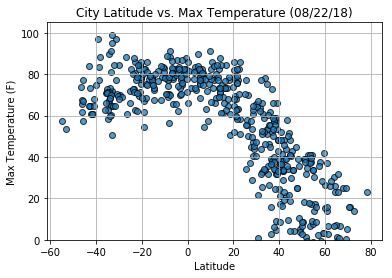

In [56]:
# scatter plot
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], marker="o", alpha=0.75, edgecolor="black")

# print title and labels
plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# set y limits and grids
plt.ylim(0,105)
plt.grid(True)

# save figure
plt.savefig("image/LattitudeVsTemp.png")

# display the figure
plt.show()

#### Latitude vs. Humidity Plot

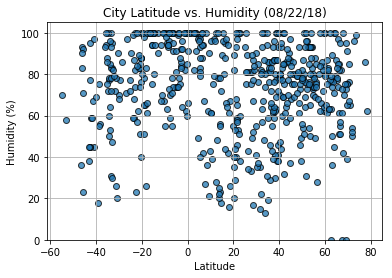

In [57]:
# scatter plot
plt.scatter(weather_df["Lat"],weather_df["Humidity"], marker="o", alpha=0.75, edgecolor="black")

# print title and labels
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# set y limits and grids
plt.ylim(0,105)
plt.grid(True)

# save figure
plt.savefig("image/LatitudeVsHumidity.png")

# display the figure
plt.show()

#### Latitude vs. Cloudiness Plot

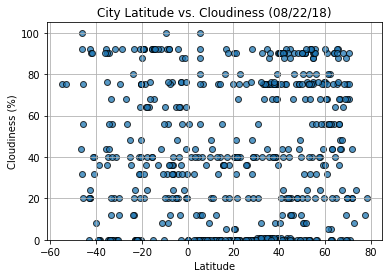

In [58]:
# scatter plot
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], marker="o", alpha=0.75, edgecolor="black")

# print title and labels
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# set y limits and grids
plt.ylim(0,105)
plt.grid(True)

# save figure
plt.savefig("image/LatitudeVsCloudiness.png")

# display the figure
plt.show()

#### Latitude vs. Wind Speed Plot

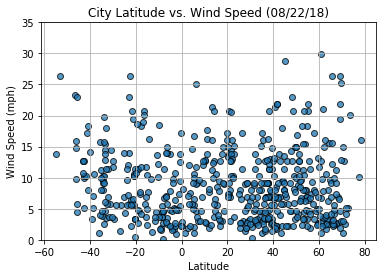

In [59]:
# scatter plot
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], marker="o", alpha=0.75, edgecolor="black")

# print title and labels
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# set y limits and grids
plt.ylim(0,35)
plt.grid(True)

# save figure
plt.savefig("image/LatitudeVsWindSpeed.png")

# display the figure
plt.show()